In [1]:
import pandas as pd
import glob
import subprocess
from collections import defaultdict
import pathlib
import subprocess
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

## homer annot

In [21]:
_type= 'Hypo'

In [22]:
all_bed_files = glob.glob(f'mC_FILTER_DMR_BED/*.{_type}.aDMR.bed')

In [23]:
class_bed_files = defaultdict(list)
for path in all_bed_files:
    _class = pathlib.Path(path).name.split('.')[0].split('-')[-1]
    class_bed_files[_class].append(path)

In [24]:
all_neuron_df_list = []
for _class, file_list in class_bed_files.items():
    dfs = [pd.read_csv(file, sep='\t', header=None) for file in file_list]
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df = combined_df[[0,1,2]]
    combined_df.drop_duplicates(inplace=True)
    
    combined_df.to_csv(f'class_combined_bed/{_class}.{_type}.combined.bed', sep='\t', header=False, index=False)
    if _class != 'NN':
        all_neuron_df_list.append(combined_df)   
    print(f'{_class} done')
    
all_comb_df = pd.concat(all_neuron_df_list)
all_comb_df.drop_duplicates(inplace=True)    
all_comb_df.to_csv(f'class_combined_bed/Neu.{_type}.combined.bed', sep='\t', header=False, index=False)

Sero done
NN done
Glut done
Gaba done
PCG done


In [25]:
all_classes = ['Sero', 'NN', 'Glut', 'Gaba', 'PCG','Neu']

In [26]:
with open(f'homer.{_type}.sh', 'w') as file:
    for _class in all_classes:
        command = f"annotatePeaks.pl class_combined_bed/{_class}.{_type}.combined.bed mm10 > class_combined_bed/{_class}.{_type}.annotated.txt"
        file.write(command)
        file.write('\n')

## plot

In [22]:
_type= 'Hyper'
_class = 'NN'

In [23]:

tmpdf = pd.read_csv(f'class_combined_bed/{_class}.{_type}.annotated.txt',
                    sep='\t', header=0, index_col=False)
annot = tmpdf['Annotation'].tolist()

all_locations  = []
for _ in annot:
    location = _.split('(')[0]
    all_locations.append(location)
data = pd.Series(all_locations).value_counts()

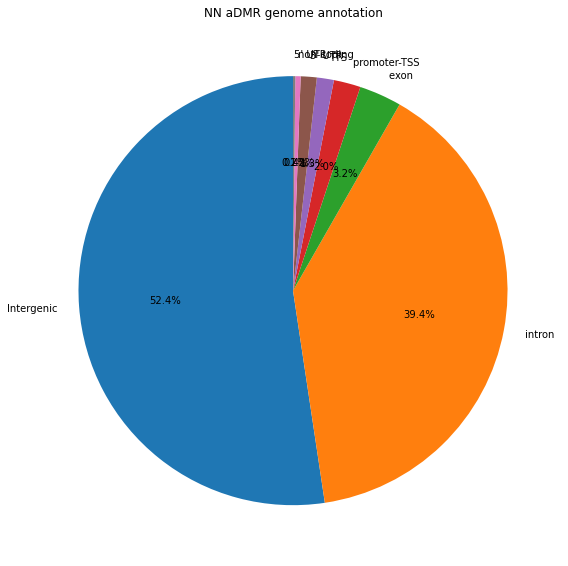

In [24]:
plt.figure(figsize=(8, 8))  # Set the figure size
data.plot.pie(autopct='%.1f%%', startangle=90)  # autopct formats the value label on each slice
plt.title(f'{_class} aDMR genome annotation')  # Set the title of the pie chart
plt.ylabel('')  # Hide the y-axis label
plt.tight_layout()
plt.savefig(f'figure/{_class}.{_type}.aDMR.genome.annotation.pdf', dpi=300)
plt.show()

In [8]:
## Hypo
percentage = data/data.sum()
percentage*100

intron           52.163053
Intergenic       35.337062
exon              6.134237
promoter-TSS      2.175450
3' UTR            1.701608
TTS               1.641919
non-coding        0.533532
5' UTR            0.313140
dtype: float64

In [12]:
## Hyper
percentage = data/data.sum()
percentage*100

Intergenic       45.174870
intron           42.493119
exon              4.723931
promoter-TSS      3.574320
TTS               1.568572
3' UTR            1.558452
non-coding        0.532302
5' UTR            0.374433
dtype: float64